# What features affect the duration of the ride
## by Sadeko Daniel

## Investigation Overview


> In this presentation I will be focusing on the duration of ride in minutes and looking at the features of the ride that can affect the duration of the ride. I will be looking at a feature engineered variable (distance), the day and hour of the ride,the type of user (subscriber or not) and the bike share feature.


## Dataset Overview

> The dataset consists of about 183,000 rides consisting of the necessary features I will be looking at, and other features, some were feature engineered to get a better information and some data were removed due to missing information and incosistencies to make the analysis go smoothly

In [14]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [15]:
# load in the dataset into a pandas dataframe

gobike = pd.read_csv("201902-fordgobike-tripdata.csv")

In [16]:
# Data Wrangling, Feature Engineering, Removing Missing and incosistent data


# Converting the duration in second to minutes to better get a definition of th duraton spend for a ride.
def convert_to_min(sec):
    return int(sec/60)
gobike["duration_min"] = gobike["duration_sec"].apply(convert_to_min)

# converting the time data from object to datetime to better perform analysis on.
gobike["start_time"] = pd.to_datetime(gobike["start_time"])
gobike["end_time"] = pd.to_datetime(gobike["end_time"])

#extracting the day and hour for the start and end time..
gobike["start_time_day"] = gobike.start_time.dt.day_name()
gobike["end_time_day"] = gobike.end_time.dt.day_name()
gobike["start_time_hour"] = gobike.start_time.dt.hour
gobike["end_time_hour"] = gobike.end_time.dt.hour

# Using the great circle or the Orthodromic distance to get the distance
# using the latitudes and logitudes of the start and end station location
from math import radians, cos, sin,asin, sqrt, atan2
def distance_cal(cols):
    
    r = 6373
    start_lat = cols[0]
    start_long = cols[1]
    end_lat = cols[2]
    end_long = cols[3]
    
    start_lat, start_long, end_lat, end_long = (radians(start_lat),radians(start_long),radians(end_lat),radians(end_long))
    
    # Haversine Formula
    dist_lat = end_lat - start_lat
    dist_long = end_long - start_long
    
    a = sin(dist_lat/2)**2 + cos(start_lat)*cos(end_lat)*sin(dist_long/2)**2
    
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    
    return round((c*r),2)

gobike["distance"] = gobike[["start_station_latitude","start_station_longitude",
                           "end_station_latitude","end_station_longitude"]].apply(distance_cal,axis=1)

#The data was taken in 2019, so getting their ages..
gobike["Age"]  = gobike["member_birth_year"].apply(lambda x: 2019 - x)

### Binning the ages
gobike["age_by_decade"] = pd.cut(gobike["Age"],
                                 bins=[10,29,39,49,59,60,150], labels = ["Teens","20s","30s","40s","50s","Old"])

# Dropping Missing data
gobike = gobike.dropna(axis=0, subset=["start_station_id"])


## Distribution of Duration

The duration of ride is a distributed on values from 1 minutes to about 1400 minutes. The distribution is plotted on a logarithmic scale showing clearly majority of the rides are within a low duration of about 3 to 25 minutes.

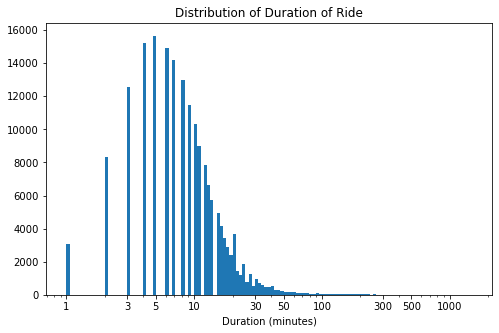

In [17]:
# This is a long tailed distribution skewed to the right, performing a log transformation on the data

# bin size to better see the data
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(gobike["duration_min"].max())+log_binsize,log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike, x = 'duration_min',bins=bins)
plt.xscale("log")
plt.xticks([1,3,5,10,30,50,100,300,500,1000], ["1","3","5","10","30","50","100","300","500","1000"])
plt.xlabel("Duration (minutes)")
plt.title("Distribution of Duration of Ride")
plt.show()

## Distribution of Distance

> The distance feature which was gotten by feature engineering from the starting location to the ending location latitudes and logitudes shows range of distance between 1km to about 40 kilmetres with most of the distance travelled to be between 1.3km to 1.6km

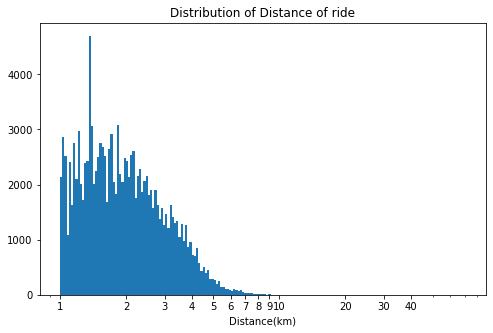

In [18]:
# This is a long tailed distribution skewed to the right, performing a log transformation on the data
log_binsize = 0.01
bins = 10 ** np.arange(0, np.log10(gobike["distance"].max())+log_binsize,log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = gobike, x = 'distance',bins=bins)
plt.xscale("log")
plt.xticks([1,2,3,4,5,6,7,8,9,10,20,30,40], ["1","2","3","4","5","6","7","8","9","10","20","30","40"])
plt.xlabel("Distance(km)")
plt.title("Distribution of Distance of ride")
plt.show()

## Hour and Day distribution of rides

The hour and day distribution for the rides is plotted and it is seen that most rides usually occur during the weekdays and less during weekends. Also more rides occur during early morning hours; 7am to 10am.

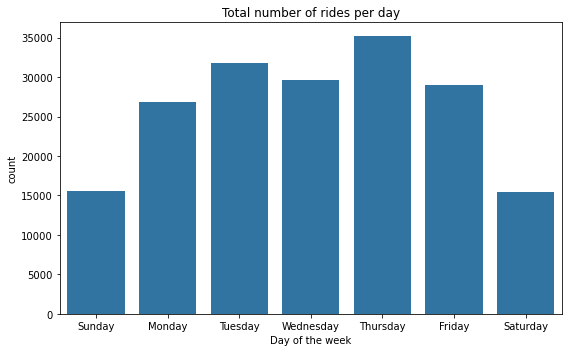

In [19]:
plt.figure(figsize=(8,5))

default_color = sb.color_palette()[0]
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
sb.countplot(data = gobike, x = "start_time_day",color = default_color, order=order)
plt.xlabel("Day of the week")
plt.title("Total number of rides per day")
plt.tight_layout()

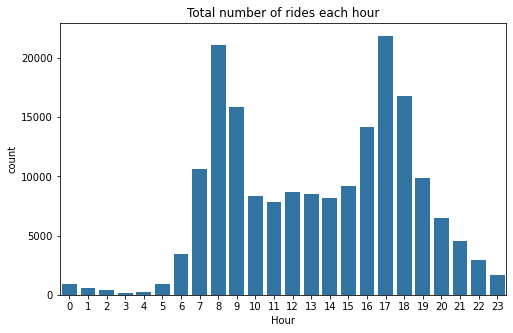

In [20]:
plt.figure(figsize=(8,5))

default_color = sb.color_palette()[0]


sb.countplot(data = gobike, x = "start_time_hour",color = default_color)
plt.xlabel("Hour")
plt.title("Total number of rides each hour");

## Duration vs Distance
Plotting the duration on a logarithmic scale and the distance on a logarithmic scale gives a fair relationship showing that most of the duration of ride still occur within short distances of 1 to 5 kilometres. The data is further analyzed to know other characteristics that would have affect the duration of a ride.

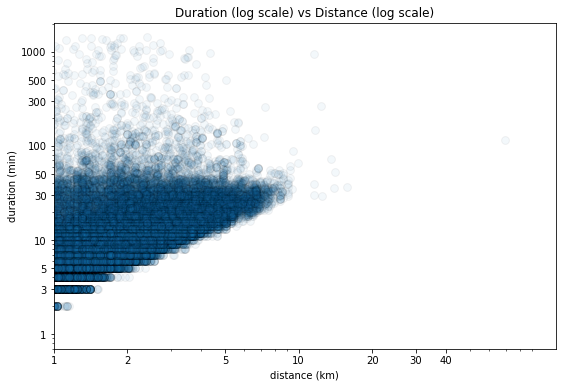

In [21]:
# Because of the nature of these features as seen the in the univariate exploration a log transformation is done on both the 
# duration and distance features.
fig, ax = plt.subplots(figsize = (9, 6))
ax.scatter(x = "distance", y = "duration_min",data = gobike, s=60, alpha=0.05, edgecolors="k")

# Set logarithmic scale on the both variables
ax.set_xscale("log")
ax.set_yscale("log")
plt.yticks([1,3,5,10,30,50,100,300,500,1000], ["1","3","5","10","30","50","100","300","500","1000"]);
plt.xticks([1,2,5,10,20,30,40], ["1","2","5","10","20","30","40"])

plt.xlabel("distance (km)")
plt.ylabel("duration (min)")
plt.title("Duration (log scale) vs Distance (log scale)");

## Duration and Distance of ride by day of the week
Longer rides are seen to occur during the weekends which from the previous chart on the distribution of days of rides, the weekends are days of lesser number of rides, these longer rides still have on average the same distance of ride. These shows that during the weekends, riders generally spend more time riding even for shorter range of distances. Outliers were removed to get a better view of the plot.

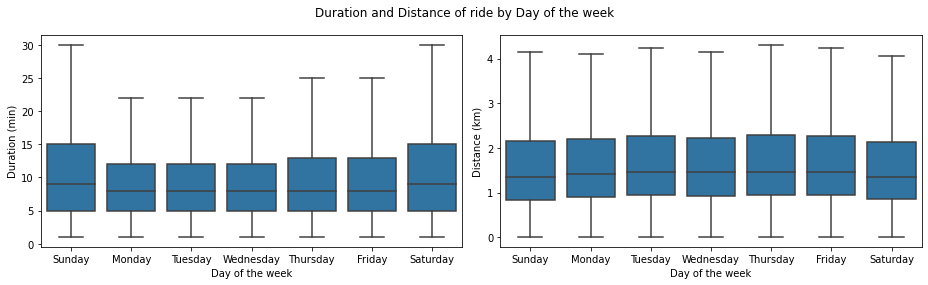

In [22]:
fig, ax = plt.subplots(ncols = 2, figsize = [13,4])


# removing the fliers to see how they are well distributed
colour = sb.color_palette()[0]
sb.boxplot(x= gobike["end_time_day"], y = gobike["duration_min"],color=colour, showfliers=False, ax=ax[0], order=order)
ax[0].set_xlabel("Day of the week")
ax[0].set_ylabel("Duration (min)")

sb.boxplot(x= gobike["end_time_day"], y = gobike["distance"],color=colour, showfliers=False, ax=ax[1],order=order)
ax[1].set_xlabel("Day of the week")
ax[1].set_ylabel("Distance (km)")

fig.suptitle("Duration and Distance of ride by Day of the week")
plt.tight_layout()

## Duration of ride vs user type and sharing of bikes for trip

In exploring the relationship between non-subscribers with the duration of ride, non-subscribers ride for longer minutes than the subscribers of the GoBike Riders, with an average of about 23 minutes. Subscribers ride on an average of 10 minutes.

Also riders generally don't share their bikes during trips taken but not too a large proportion

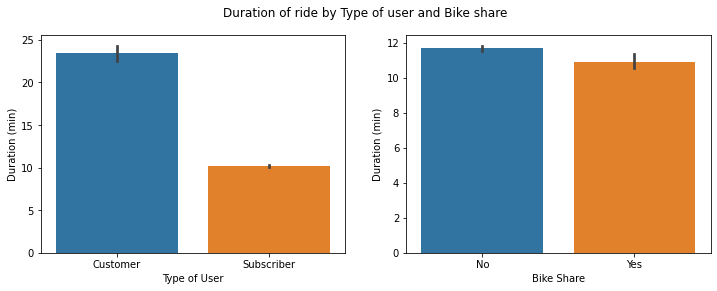

In [23]:
fig, ax = plt.subplots(ncols = 2, figsize = [12,4])


#relationship between  and subscriber
sb.barplot(x ="user_type",y = "duration_min", data=gobike, ax=ax[0])
ax[0].set_xlabel("Type of User")
ax[0].set_ylabel("Duration (min)")

#relationship between  and subscriber
sb.barplot(x ="bike_share_for_all_trip",y = "duration_min", data=gobike, ax=ax[1])
ax[1].set_xlabel("Bike Share")
ax[1].set_ylabel("Duration (min)")
fig.suptitle("Duration of ride by Type of user and Bike share");

## Relationship between the Duration and the day of the week based on the user_type and bike share
We can see how subscribers and non-subscribers behave during the days of the week with respect ot the time spend on their rides.
Non-subscribers tend to have longer duration rides during the weekends (Sundays and Saturdays) and subscribers have longer duration rides during the weekdays.

Looking at it from the sharing of bikes during trip, it can be seen that on those same weekends, riders share their rides during their trip more and during the weekdays, we see more of riders not sharing their bikes for the trips they take.


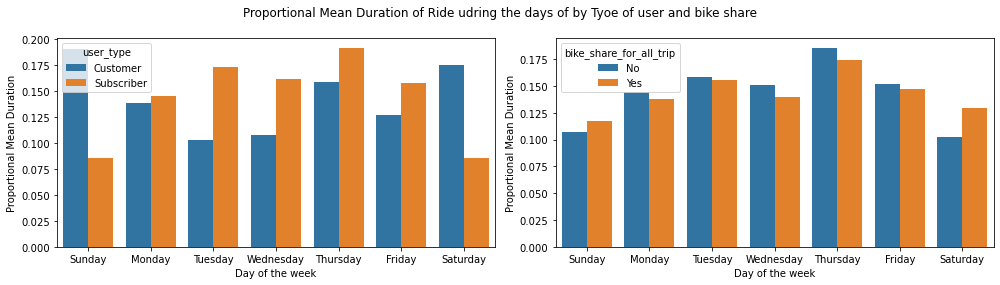

In [24]:
fig, ax = plt.subplots(ncols = 2, figsize = [14,4])


# Getting the proportional mean duration of the user_type for each day of the week
user_by_day = gobike.groupby(["start_time_day","user_type"]).sum()["duration_min"]/gobike.groupby("user_type").sum()["duration_min"]
user_by_day = user_by_day.reset_index(name="mean")

#plotting
sb.barplot(x="start_time_day", y = "mean", hue="user_type", data = user_by_day, ax=ax[0], order=order)
ax[0].set_xlabel("Day of the week")
ax[0].set_ylabel("Proportional Mean Duration")


# Getting the proportional mean duration of the bike_share for each day of the week
bike_share_by_day = gobike.groupby(["start_time_day","bike_share_for_all_trip"]).sum()["duration_min"]/gobike.groupby("bike_share_for_all_trip").sum()["duration_min"]
bike_share_by_day = bike_share_by_day.reset_index(name="mean")

#plotting
sb.barplot(x="start_time_day", y = "mean", hue="bike_share_for_all_trip", data = bike_share_by_day, ax=ax[1], order=order);
ax[1].set_xlabel("Day of the week")
ax[1].set_ylabel("Proportional Mean Duration")
fig.suptitle("Proportional Mean Duration of Ride udring the days of by Tyoe of user and bike share")

plt.tight_layout()
plt.show();


In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt